In [1]:
# # environnement Nicolas // Mount GDrive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import pandas as pd

file_path = "/content/drive/MyDrive/Datascientest/Projet PY_email Datascientest/Data/Enron Cleaned Data/"
file_name = "enron_unique_1000"
file = file_path+file_name+'.csv'

df_emails = pd.read_csv(file)
df_emails.tail(10)
deb = 0
fin = df_emails.shape[0]

file_name_out = file_name+'_clust'
print(file_name_out)

enron_unique_1000_clust


In [3]:
# SAUVEGARDE en csv du résultat.
def svgd_csv_xls (file_path,file_name):

# to .CSV
  file_extension = ".csv"
  file = file_path+file_name+file_extension
  print("File : ",file)
  df_emails.to_csv(file, encoding='utf-8', index=False)
# df_emails[deb:fin].to_csv(file, encoding='utf-8', index=False)
  print("Svgde effectuée")
  return


In [ ]:
# environnement Franck
import pandas as pd
file = "/Users/franckglastre/Documents/GitHub/NLP-Datascientest/data_clean.csv"
df_emails = pd.read_csv(file,nrows=50000)

In [4]:
df_emails.head(5)

,date,from,to,header,body,cc,NER_header,NER_body,body_clean,body_principal,body_dict,Datetime,longueur_body
0,2001-04-24 12:27:00-07:00,phillip.allen@enron.com,mike.grigsby@enron.com,NaN,"['', '', '---------------------- Forwarded by ...",NaN,NaN,NaN,NaN,t FYI tSelling d of SoCal XH lowers overall d...,NaN,2001-04-24,124
1,2001-02-16 00:52:00-08:00,phillip.allen@enron.com,jsmith@austintx.com,RE:,"['', 'Jeff,', '', 'Here is the application fro...",NaN,NaN,NaN,NaN,RE I was told that you were faxed the loan ap...,NaN,2001-02-16,471
2,2001-10-22 11:29:43-07:00,webmaster@earnings.com,pallen@enron.com,AXP Earnings Information,"['', 'If you cannot read this email, please cl...",NaN,NaN,NaN,NaN,If you cannot read this email please click he...,NaN,2001-10-22,18317
3,2001-10-22 20:58:34-07:00,vivatrim@open2win.roi1.net,pallen@enron.com,"PHILLIP, want to lose weight? Look younger?","['', '[IMAGE]', ""If you can't see this click h...",NaN,NaN,NaN,NaN,IMAGE If you can t see this click here t Ulti...,NaN,2001-10-22,912
4,2001-10-18 00:41:45-07:00,oportunity@cells4free.com,pallen@enron.com,Free 2001 Cell Phones..!,"['', '<!--To put this html into an existing HT...",NaN,NaN,NaN,NaN,To put this html into an existing HTML docume...,NaN,2001-10-18,5343


In [5]:
df_emails.isna().sum()

date                 0
from                 0
to                   0
header              24
body                 0
cc                1000
NER_header        1000
NER_body          1000
body_clean        1000
body_principal       0
body_dict         1000
Datetime             0
longueur_body        0
dtype: int64

# A) Vectorization with TF-IDF Vectorizer




In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
from nltk.corpus import stopwords

data = df_emails['body_principal']

#tf_idf_vectorizor = TfidfVectorizer(stop_words = 'english',max_features = 20000, decode_error='ignore')
tf_idf_vectorizor = TfidfVectorizer(stop_words = 'english', max_features=None ,decode_error='ignore')
tf_idf = tf_idf_vectorizor.fit_transform(data)
tf_idf_norm = normalize(tf_idf)

tf_idf_array = tf_idf_norm.toarray()
pd.DataFrame(tf_idf_array, columns=tf_idf_vectorizor.get_feature_names_out()).head()


tf_idf_dtm = pd.DataFrame(tf_idf_norm.toarray(), columns=tf_idf_vectorizor.get_feature_names_out()).head()
tf_idf_dtm.shape

AttributeError: 'TfidfVectorizer' object has no attribute 'get_feature_names_out'

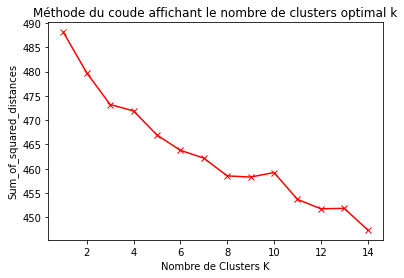

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
   km = KMeans(n_clusters=k, max_iter=200, n_init=10, random_state=0)
   km = km.fit(tf_idf)
   Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'rx-')
plt.xlabel('Nombre de Clusters K')
plt.ylabel('Sum_of_squared_distances')
plt.title('Méthode du coude affichant le nombre de clusters optimal k')
plt.show()

In [ ]:
# update k en fonction du matplotlib precedent
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(tf_idf)
labels=model.labels_
#
df_emails["labels"]=pd.Series(labels)
df_emails["labels"].value_counts()

0    412
2     48
1     40
Name: labels, dtype: int64

In [ ]:
# affichage labels sur un échantillon aléatoire
# df_emails[labels==3][["labels","NER_header","NER_body","header"]].sample(20)
df_emails[["labels","NER_header","NER_body","header","body_principal"]].sample(20)

,labels,NER_header,NER_body,header,body_principal
81,0,NaN,NaN,Well head,"X-Origin: Farmer-D, X-FileName: dfarmer.nsf St..."
416,0,NaN,NaN,AvantGo Travel Survey - Your help wanted!,"***********************, AvantGo Travel Surve..."
390,0,NaN,NaN,(01-50) Position Adjustment Deadlines for the ...,"X-FileName: sshackle.nsf Notice No. 01-50, Feb..."
453,0,NaN,NaN,Re: Cover letter - and the file !,Re: Cover letter I am sending you the Spanish...
283,0,NaN,NaN,Fuel Cell Purchase Order,"X-Origin: MANN-K, X-FileName: kmann.nsf Per my..."
205,0,NaN,NaN,RE: ENA DPR,Thanks for the info. A couple of things about...
478,0,NaN,NaN,Cal 02,Paul can transact El Paso Permian Cal 02 @ $3...
44,0,NaN,NaN,ASAP please -- EBS on site power deals,"ASAP please -- EBS on site power deals , EBS ..."
160,1,NaN,NaN,Re: RUSH Approval - ANP Power Marketing Company,Thanks for such a prompt response! tHarry M C...
167,0,NaN,NaN,"Ameren Energy Fuels, as Agent for 3 Utilities","X-Origin: Jones-T, X-FileName: TJONES Non-Priv..."


In [ ]:

svgd_csv_xls (file_path,file_name_out)

File :  /content/drive/MyDrive/Datascientest/Projet PY_email Datascientest/Data/Enron Cleaned Data/enron_output_500_bis_clust.csv
Svgde effectuée


# B) Vectorization with Count Vectorizer

In [ ]:
# préparation du corpus de mots avec fonction de nettoyage
# prend une string / retourne une string

import re
def data_cleanstr(string):
    r = re.compile(r'[a-zA-Z0-9.-]*@[a-zA-Z0-9.-]*')
    tok=r.sub('mail', string)
    
    r = re.compile(r"([^a-zA-Z]+)")
    tok1=r.sub(' ', tok)
    return tok1

In [ ]:
# préparation fonction stopwords
# prend une string / retourne une string


def remove_stop_words(text):
    import spacy
    from spacy.lang.en.stop_words import STOP_WORDS
    stopwords=list(STOP_WORDS)
    lst=[]

    for token in text.split(" "):
        if token.lower() not in stopwords:    #checking whether the word is not 
            lst.append(token)                    #present in the stopword list.      
            result = ' '.join(lst)
    return result


In [ ]:
# tokenisation du corpus de mots, utilisation de la fonction de nettoyage et mise en minuscules
# prend retourne un dataframe / retourne une liste
import nltk
nltk.download('punkt')

def tokenize_mots(df):    
    texte=[]
    phrases=""
    from nltk.tokenize import word_tokenize

    for i in df['body_principal']:
        phrases+=i  
    a=data_cleanstr(str(phrases))
    mots=word_tokenize(a)
    mots=[i.lower() for i in mots]
    return mots

# création liste mots pour corpus sur le champs body_principal
mots=tokenize_mots(df_emails)

# création liste mots pour corpus sans Stopwords
from spacy.lang.en.stop_words import STOP_WORDS
stopwords=list(STOP_WORDS)
mots_sans=[]
for mot in mots:
    if mot not in stopwords:
        mots_sans.append(mot)

print("nbr corpus :",len(mots))
print("nbr corpus sans stop words :",len(mots_sans))

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/franckglastre/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


nbr corpus : 12973398
nbr corpus sans stop words : 8136707


In [ ]:
#NEW

def tokenize_mots_str(phr):    
    from nltk.tokenize import word_tokenize
    mots=word_tokenize(data_cleanstr(phr))
    mots=[i.lower() for i in mots]
    return mots



In [ ]:
# MAJ ////////////////////// de cette section pour prise en compte du NER N ou V
# lematisation du corpus, 2 ere ligne à réactiver si besoin
# prend une liste / retourne une liste

import nltk
nltk.download('omw-1.4')


nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

def lematize_mots(corpus):
    from nltk.stem import WordNetLemmatizer

    # Initialiser un lemmatiseur
    wordnet_lemmatizer = WordNetLemmatizer()

    #Calculer le lemme du mot meeting
    corp=[]
    for mot in corpus:
        corp.append(wordnet_lemmatizer.lemmatize(mot, pos=get_wordnet_pos(mot)))
    #utilisation de list(set()) pour supprimer les doublons
    return corp


corpus_sans=lematize_mots(mots_sans)



[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/franckglastre/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/franckglastre/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
print("nbr de mots",len(mots_sans))
print("nbr de mots après lemmatisation",len(corpus_sans))

nbr de mots 1059338
nbr de mots après lemmatisation 1059338


In [ ]:
#NEW Prend une str / retourne une str --> lemmatizer optimisé

import nltk
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

def lematize_mots_str(phr):
    from nltk.stem import WordNetLemmatizer
    phrase=phr.split(" ")
    # Initialiser un lemmatiseur
    wordnet_lemmatizer = WordNetLemmatizer()

    #Calculer le lemme du mot meeting
    corp=[]
    for mot in phrase:
        corp.append(wordnet_lemmatizer.lemmatize(mot, pos=get_wordnet_pos(mot)))
    #utilisation de list(set()) pour supprimer les doublons
    return " ".join(corp)

lematize_mots_str("the word is very exciting")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/franckglastre/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


'the word be very excite'

In [ ]:
# vectorisation du corpus de mots
# retourne un dictionnaire

def bagofwords(corpus):
    from sklearn.feature_extraction.text import CountVectorizer

    # Créer un vectorisateur
    vectorizer = CountVectorizer()

    # Appliquer Bag of words à la variable tokens
    vectorizer.fit_transform(corpus).todense()

    # Récupération des tokens
    #tokenized = vectorizer.vocabulary_
    #token=dict(sorted(tokenized.items(),key= lambda x:x[1],reverse=True))
    #print(token)

    return vectorizer

#vectorizer=bagofwords(corpus)
vectorizer_sans=bagofwords(corpus_sans)

In [ ]:
# vectorisation de chaque email 1 par 1 et enregistrement dans une colonne dédiée body_vect, au passage création de body_clean

texte=[]
# on duplique le contenu de df_emails vers df pour conserver les résultats antérieurs
df=df_emails
df['body_clean']=""
df["body_vect"]=""
df["body_vect_sans"]=""
for i,j in enumerate(df['body_principal']):
    text=data_cleanstr(str(j))
    df.loc[i,"body_clean"]=text
    #df.loc[i,"body_vect"]=[vectorizer.transform([text]).toarray()]
    df.loc[i,"body_vect_sans"]=[vectorizer_sans.transform([text]).toarray()]
        
        
# liste contenant le corpus de mots, le premier avec les stopwords, le second sans les stopswords --> épuré des chiffres,
# et des signes de ponctuations ou autres

In [ ]:
df.isna().sum()

Unnamed: 0           0
date                 0
from                 0
to                   0
header            1964
body                 0
Datetime             0
body_principal       0
longueur_body        0
body_clean           0
body_vect            0
body_vect_sans       0
dtype: int64

In [ ]:
#df=df.dropna()     # modif nicolas
lfunc = lambda e: e[0]
#df['body_vect2']=df['body_vect'].map(lambda x:lfunc(x))
df['body_vect_sans2']=df['body_vect_sans'].map(lambda x:lfunc(x))
df.head(5)

,Unnamed: 0,date,from,to,header,body,Datetime,body_principal,longueur_body,body_clean,body_vect,body_vect_sans,body_vect_sans2
0,0,2001-05-14 16:39:00-07:00,phillip.allen@enron.com,tim.belden@enron.com,NaN,"['', 'Here is our forecast', '', ' ']",2001-05-14,Here is our forecast,22,Here is our forecast,,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1,2001-05-04 13:51:00-07:00,phillip.allen@enron.com,john.lavorato@enron.com,Re:,"['', 'Traveling to have a business meeting tak...",2001-05-04,Traveling to have a business meeting takes th...,774,Traveling to have a business meeting takes th...,,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,2,2000-10-18 03:00:00-07:00,phillip.allen@enron.com,leah.arsdall@enron.com,Re: test,"['', 'test successful. way to go!!!']",2000-10-18,test successful. way to go,28,test successful way to go,,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,3,2000-10-23 06:13:00-07:00,phillip.allen@enron.com,randall.gay@enron.com,NaN,"['', 'Randy,', '', ' Can you send me a schedul...",2000-10-23,Randy Can you send me a schedule of the salar...,179,Randy Can you send me a schedule of the salar...,,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,4,2000-08-31 05:07:00-07:00,phillip.allen@enron.com,greg.piper@enron.com,Re: Hello,"['', ""Let's shoot for Tuesday at 11:45. ""]",2000-08-31,Let s shoot for Tuesday at .,30,Let s shoot for Tuesday at,,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

# Initialisaion de la figrue
plt.figure(figsize=(20, 10))

body_linkage = np.concatenate([i.reshape((1,-1)) for i in df.body_vect2.values], axis=0)
Z = linkage(body_linkage, method = 'ward', metric = 'euclidean')


plt.title("Dendrogramme CAH")
dendrogram(Z, labels = df.index, leaf_rotation = 90., color_threshold = 0)
plt.show()

AttributeError: 'DataFrame' object has no attribute 'body_vect2'

<Figure size 1440x720 with 0 Axes>

In [ ]:
body_linkage_sans = np.concatenate([i.reshape((1,-1)) for i in df.body_vect_sans2.values], axis=0)
Z = linkage(body_linkage_sans, method = 'ward', metric = 'euclidean')

plt.figure(figsize=(20, 10))
plt.title("Dendrogramme CAH")
dendrogram(Z, labels = df.index, leaf_rotation = 90., color_threshold = 0)
plt.show()

In [ ]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,20)
for k in K:
   km = KMeans(n_clusters=k, max_iter=200, n_init=10, random_state=0)
   km = km.fit(body_linkage)
   Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
import numpy as np
body_linkage_sans = np.concatenate([i.reshape((1,-1)) for i in df.body_vect_sans2.values], axis=0)
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,20)
for k in K:
   km = KMeans(n_clusters=k, max_iter=200, n_init=10, random_state=0)
   km = km.fit(body_linkage_sans)
   Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(body_linkage)
labels=model.labels_

print(pd.Series(labels))
print(len(df))

0      0
1      0
2      0
3      0
4      0
      ..
495    1
496    0
497    0
498    0
499    0
Length: 500, dtype: int32
500


In [ ]:
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(body_linkage_sans)
labels_sans=model.labels_

print(pd.Series(labels))
print(len(df))

0      0
1      0
2      0
3      0
4      0
      ..
495    1
496    0
497    0
498    0
499    0
Length: 500, dtype: int32
500


In [ ]:
df[df['labels']==1][['body_clean','labels']]

,body_clean,labels
68,Re ENA Associate Analyst Dinner I believe thi...,1
83,Re Cornhusker John I have a draft that I have...,1
97,mail X From Scott Mills X To Dave Nommensen X ...,1
98,Re Imbalance trades on CNG Hi team Laurie has...,1
101,X Origin Giron D X FileName dgiron nsf Genaro ...,1
102,Forwarded by Darron C Giron HOU ECT on AM Fro...,1
111,New Generation as of Oct th Forwarded by Phil...,1
123,Please put on my schedule Mark Forwarded by M...,1
125,Bryan Bobs number is Let me know your impress...,1
151,X Origin HYVL D X FileName dhyvl nsf Susan I a...,1


In [ ]:
df[df['labels_sans']==1][['body_clean','labels_sans']]

KeyError: ignored

In [ ]:
df[df['labels']==2][['body_clean','labels']]

,body_clean,labels
8,Inline attachment follows From O ENRON OU NA ...,2
35,you snooze you lose i wouldnt mind a little r...,2
55,X bcc X Folder Jeff Dasovich Dec Notes Folders...,2
75,X To DL NETCO Gas Traders O ENRON OU NA CN REC...,2
76,Sorry I didnt get back to you I have to run s...,2
91,X bcc X Folder Drew Fossum Dec June Notes Fold...,2
110,X To Maggi Mike O ENRON OU NA CN RECIPIENTS CN...,2
115,mail mail mail mail mail mail mail mail mail m...,2
119,mail mail mail mail mail mail mail mail mail m...,2
120,mail mail mail mail mail mail X From Schedule ...,2


In [ ]:
df[df['labels_sans']==2][['body_clean','labels_sans']]

KeyError: ignored

# Bibliographie ou References

In [ ]:
# https://medium.com/towards-data-science/k-means-clustering-8e1e64c1561c
# a voir ? https://www.kaggle.com/code/dfoly1/k-means-clustering-from-scratch/notebook
# https://www.kaggle.com/code/longtng/nlp-preprocessing-feature-extraction-methods-a-z
# https://www.kaggle.com/code/dikshabhati2002/nlp-for-beginners
# https://www.kaggle.com/code/ashagutlapalli/nlp-101-with-nltk-and-spacy-text-analysis
# https://www.kaggle.com/code/liruffel/atelier-nlp/notebook

# guide A a Z Preprocessing : https://www.kaggle.com/code/longtng/nlp-preprocessing-feature-extraction-methods-a-z

# C) Clusterisation avec W2V

In [ ]:
#NEW Prend une str / retourne une str --> lemmatizer optimisé

import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

def lematize_mots_str(phr):
    from nltk.stem import WordNetLemmatizer
    phrase=phr.split(" ")
    # Initialiser un lemmatiseur
    wordnet_lemmatizer = WordNetLemmatizer()

    #Calculer le lemme du mot meeting
    corp=[]
    for mot in phrase:
        corp.append(wordnet_lemmatizer.lemmatize(mot, pos=get_wordnet_pos(mot)))
    #utilisation de list(set()) pour supprimer les doublons
    return " ".join(corp)

lematize_mots_str("the word is very exciting")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


'the word be very excite'

In [ ]:
df_emails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            1000 non-null   object 
 1   from            1000 non-null   object 
 2   to              1000 non-null   object 
 3   header          976 non-null    object 
 4   body            1000 non-null   object 
 5   cc              0 non-null      float64
 6   NER_header      0 non-null      float64
 7   NER_body        0 non-null      float64
 8   body_clean      0 non-null      float64
 9   body_principal  1000 non-null   object 
 10  body_dict       0 non-null      float64
 11  Datetime        1000 non-null   object 
 12  longueur_body   1000 non-null   int64  
dtypes: float64(5), int64(1), object(7)
memory usage: 101.7+ KB


In [ ]:
# nettoyage du texte

# préparation du corpus de mots avec fonction de nettoyage
# prend une string / retourne une string

import re
def data_cleanstr(string):
    r = re.compile(r'[a-zA-Z0-9.-]*@[a-zA-Z0-9.-]*')
    tok=r.sub('mail', string)
    
    r = re.compile(r"([^a-zA-Z\.$]+)")
    tok1=r.sub(' ', tok)
    return tok1

texte=[]
df_emails['body_clean']=""

for i,j in enumerate(df_emails['body_principal']):
    df_emails.loc[i,"body_clean"]=lematize_mots_str((data_cleanstr(str(j))))

In [ ]:
df_emails.head(10)

,date,from,to,header,body,cc,NER_header,NER_body,body_clean,body_principal,body_dict,Datetime,longueur_body
0,2001-04-24 12:27:00-07:00,phillip.allen@enron.com,mike.grigsby@enron.com,NaN,"['', '', '---------------------- Forwarded by ...",NaN,NaN,NaN,t FYI tSelling d of SoCal XH lower overall de...,t FYI tSelling d of SoCal XH lowers overall d...,NaN,2001-04-24,124
1,2001-02-16 00:52:00-08:00,phillip.allen@enron.com,jsmith@austintx.com,RE:,"['', 'Jeff,', '', 'Here is the application fro...",NaN,NaN,NaN,RE I be told that you be faxed the loan appli...,RE I was told that you were faxed the loan ap...,NaN,2001-02-16,471
2,2001-10-22 11:29:43-07:00,webmaster@earnings.com,pallen@enron.com,AXP Earnings Information,"['', 'If you cannot read this email, please cl...",NaN,NaN,NaN,If you cannot read this email please click he...,If you cannot read this email please click he...,NaN,2001-10-22,18317
3,2001-10-22 20:58:34-07:00,vivatrim@open2win.roi1.net,pallen@enron.com,"PHILLIP, want to lose weight? Look younger?","['', '[IMAGE]', ""If you can't see this click h...",NaN,NaN,NaN,IMAGE If you can t see this click here t Ulti...,IMAGE If you can t see this click here t Ulti...,NaN,2001-10-22,912
4,2001-10-18 00:41:45-07:00,oportunity@cells4free.com,pallen@enron.com,Free 2001 Cell Phones..!,"['', '<!--To put this html into an existing HT...",NaN,NaN,NaN,To put this html into an exist HTML document ...,To put this html into an existing HTML docume...,NaN,2001-10-18,5343
5,2001-10-23 15:14:37-07:00,jsmith@austintx.com,k..allen@enron.com,Properties for sale,"['', 'There are three other deals that I will ...",NaN,NaN,NaN,There be three other deal that I will fax to ...,There are three other deals that I will fax t...,NaN,2001-10-23,266
6,2001-05-29 05:04:48-07:00,k..allen@enron.com,editor@cookingsweeps.com,RE: 1/2 Price Omaha Steaks Sale!,"['', 'Please remove from email.', '', 'Phillip...",NaN,NaN,NaN,Please remove from email. Phillip Allen Origi...,Please remove from email. Phillip Allen Origi...,NaN,2001-05-29,2754
7,2001-03-05 23:43:00-08:00,john.arnold@enron.com,greg.whalley@enron.com,Enron Mentions - 03-04-01,"['', '---------------------- Forwarded by John...",NaN,NaN,NaN,Enron Mentions Utility Deregulation Square Pe...,Enron Mentions Utility Deregulation Square Pe...,NaN,2001-03-05,29927
8,2000-11-30 09:43:00-08:00,sarah-joy.hunter@enron.com,jeffrey.shankman@enron.com,"Continental/Enron meeting, December 11th, 2-3 PM","['X-Origin: ARNOLD-J', 'X-FileName: jarnold.ns...",NaN,NaN,NaN,X Origin ARNOLD J X FileName jarnold.nsf Mr. ...,X Origin ARNOLD J X FileName jarnold.nsf Mr. ...,NaN,2000-11-30,2510
9,2001-05-14 16:03:00-07:00,epao@mba2002.hbs.edu,john.arnold@enron.com,RE: Defense,"['', 'i am open to any of your wonderful ideas...",NaN,NaN,NaN,i be open to any of your wonderful ideas. new...,i am open to any of your wonderful ideas. new...,NaN,2001-05-14,192


In [ ]:
# nettoyage stopwords

# préparation fonction stopwords
# prend une string / retourne une string


def remove_stop_words(text):
    import spacy
    from spacy.lang.en.stop_words import STOP_WORDS
    stopwords=list(STOP_WORDS)
    lst=[]
    result = ''

    for token in text.split():
        if token.lower() not in stopwords:    #checking whether the word is not 
            lst.append(token)                    #present in the stopword list.      
            result = ' '.join(lst)
    return result

df_emails['body_clean_SW']=df_emails['body_clean'].apply(lambda l:remove_stop_words(l))


In [ ]:
# NEW 

import gensim.downloader as api
model = api.load("glove-wiki-gigaword-200")



In [ ]:
model[df_emails['body_clean_SW'][0]]

TypeError: ignored

In [ ]:

df_emails['body_clean_SW'].isna().sum()

0

In [ ]:
# NEW création de la fonction vect_W2V pour créer la sommation de vecteurs de chaque tokens pour une phrase donnée
import numpy as np

def vect_W2V(a):
    liste=tokenize_mots_str(a)
    vecteur=np.zeros((200,), dtype = 'float32')
    mot_lost=[]
    for mot in liste:
        try:
            vect=model[mot]
            vecteur+=vect
        except:
            mot_lost.append(mot)
    return vecteur



In [ ]:
import nltk
nltk.download('punkt')
# NEW pplication de la fonction dans une colonne dédié du Dataframe
df_emails['body_vect_W2V']=""        
df_emails['body_vect_W2V']=df_emails['body_clean_SW'].apply(lambda l:vect_W2V(l))    


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df_emails.head(5)

,date,from,to,header,body,cc,NER_header,NER_body,body_clean,body_principal,body_dict,Datetime,longueur_body,body_clean_SW,body_vect_W2V
0,2001-04-24 12:27:00-07:00,phillip.allen@enron.com,mike.grigsby@enron.com,NaN,"['', '', '---------------------- Forwarded by ...",NaN,NaN,NaN,t FYI tSelling d of SoCal XH lower overall de...,t FYI tSelling d of SoCal XH lowers overall d...,NaN,2001-04-24,124,t FYI tSelling d SoCal XH lower overall desk V...,"[2.6597035, 0.7176981, -1.6042211, -1.4310961,..."
1,2001-02-16 00:52:00-08:00,phillip.allen@enron.com,jsmith@austintx.com,RE:,"['', 'Jeff,', '', 'Here is the application fro...",NaN,NaN,NaN,RE I be told that you be faxed the loan appli...,RE I was told that you were faxed the loan ap...,NaN,2001-02-16,471,told faxed loan application. send attachment b...,"[8.481158, 14.431484, 5.451479, -11.590918, 6...."
2,2001-10-22 11:29:43-07:00,webmaster@earnings.com,pallen@enron.com,AXP Earnings Information,"['', 'If you cannot read this email, please cl...",NaN,NaN,NaN,If you cannot read this email please click he...,If you cannot read this email please click he...,NaN,2001-10-22,18317,read email click . Earnings.com News Earnings....,"[244.51515, 373.08765, -237.95184, -210.63383,..."
3,2001-10-22 20:58:34-07:00,vivatrim@open2win.roi1.net,pallen@enron.com,"PHILLIP, want to lose weight? Look younger?","['', '[IMAGE]', ""If you can't see this click h...",NaN,NaN,NaN,IMAGE If you can t see this click here t Ulti...,IMAGE If you can t see this click here t Ulti...,NaN,2001-10-22,912,IMAGE t click t Ultimate Weight Loss Program W...,"[9.095172, 27.848433, -9.512393, -10.235364, 2..."
4,2001-10-18 00:41:45-07:00,oportunity@cells4free.com,pallen@enron.com,Free 2001 Cell Phones..!,"['', '<!--To put this html into an existing HT...",NaN,NaN,NaN,To put this html into an exist HTML document ...,To put this html into an existing HTML docume...,NaN,2001-10-18,5343,html exist HTML document copy JavaScript paste...,"[161.2023, 242.16461, 11.270188, 55.25496, 268..."


In [ ]:
df_emails['body_vect_W2V'][10]

array([ 2.64911537e+01,  2.35862999e+01,  1.12226315e+01, -1.55536909e+01,
        2.56577516e+00, -4.38735294e+00, -3.44827347e+01,  1.42724311e+00,
       -2.87059712e+00,  1.99617195e+01, -5.37681675e+00,  2.21520672e+01,
        4.23069096e+00,  6.53402328e-01,  3.57692642e+01, -5.85319424e+00,
       -1.37089605e+01,  2.39736996e+01,  4.93049431e+00, -1.54987459e+01,
        1.11713850e+00,  2.57264099e+02, -2.56501656e+01, -1.51468444e+00,
        4.90681601e+00, -1.66768122e+00,  2.58313847e+00,  1.69008350e+01,
        1.29325752e+01, -8.82569313e-01, -1.31583300e+01, -1.37012529e+01,
       -2.97337621e-02, -4.16928148e+00, -5.25912523e+00, -1.99004936e+01,
       -4.17188759e+01, -2.23993645e+01, -4.64900017e+00,  5.24825573e+00,
        1.78097630e+00, -1.19520378e+01,  4.79502499e-01,  2.74348965e+01,
       -1.48967695e+01,  1.71495986e+00,  4.33510818e+01, -1.00708275e+01,
       -1.71448193e+01,  1.18717360e+00,  4.50362492e+00, -1.20753784e+01,
       -3.09157777e+00,  

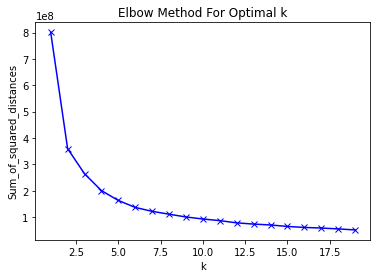

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

body_linkage_W2V = np.concatenate([i.reshape((1,-1)) for i in df_emails.body_vect_W2V.values], axis=0)

Sum_of_squared_distances = []
K = range(1,20)
for k in K:
   km = KMeans(n_clusters=k, max_iter=200, n_init=10, random_state=0)
   km = km.fit(body_linkage_W2V)
   Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [ ]:
# NEW
true_k = 4
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(body_linkage_W2V)
labels_W2V=model.labels_

print(pd.Series(labels_W2V))
print(len(df_emails))

0      0
1      0
2      2
3      0
4      3
      ..
995    3
996    0
997    0
998    0
999    0
Length: 1000, dtype: int32
1000


In [ ]:
# NEW

df_emails['labels_W2V']=pd.Series(labels_W2V)
print(df_emails['labels_W2V'].unique())
# print(len(df_emails[df_emails['labels_W2V']==0]))
# print(len(df_emails[df_emails['labels_W2V']==1]))
# print(len(df_emails[df_emails['labels_W2V']==2]))
# print(len(df_emails[df_emails['labels_W2V']==3]))

df_emails['labels_W2V'].value_counts()

[0 2 3 1]


0    860
3    119
2     19
1      2
Name: labels_W2V, dtype: int64

In [ ]:
# New --> test avec label 0
df_emails[df_emails['labels_W2V']==0][['body_clean']]

,body_clean
0,t FYI tSelling d of SoCal XH lower overall de...
1,RE I be told that you be faxed the loan appli...
3,IMAGE If you can t see this click here t Ulti...
5,There be three other deal that I will fax to ...
9,i be open to any of your wonderful ideas. new...
...,...
994,X bcc X Folder Y Barbo Paul Y Barbo Paul Oman...
996,FYI Original Message From tJohn Wyman mail ma...
997,X Origin ZIPPER A X FileName Zipper Andy.pst ...
998,same plan


In [ ]:
# New --> test avec label 1
df_emails[df_emails['labels_W2V']==1][['body_clean']]

,body_clean
7,Enron Mentions Utility Deregulation Square Pe...
419,Forwarded by Steven J Kean NA Enron on PM tMi...


In [ ]:
# New --> test avec label 2
df_emails[df_emails['labels_W2V']==2][['body_clean']]

,body_clean
2,If you cannot read this email please click he...
31,SOUTHWEST AIRLINES CLICK N SAVE E MAIL UPDATE...
78,E TRADE Latest news happening IMAGE Get Micro...
119,Hi Folks Here s how I see the Passing Game Ma...
296,X FileName MHAEDIC Non Privileged .pst http s...
346,Use of Letters of Credit Certain Securities a...
363,Dear Tana It s the American Airlines Fare Sal...
404,Content Transfer Encoding bit Return Path mai...
429,mail mail mail mail mail mail mail mail mail ...
492,IMAGE Battle your friend for glory in Planter...


In [ ]:
# New --> test avec label 3
df_emails[df_emails['labels_W2V']==3][['body_clean']]

,body_clean
4,To put this html into an exist HTML document ...
6,Please remove from email. Phillip Allen Origi...
8,X Origin ARNOLD J X FileName jarnold.nsf Mr. ...
24,yep Amir Cyrus Ahanchian mail on PM To mail c...
33,Dear icruise Member ICRUISE SPECIALS FOR WEEK...
...,...
966,AMAZING MELT AWAY FAT ABSORBER CAPSULES FREE ...
970,X Origin Williams B X FileName Williams III B...
978,Group Here s the plan for Sunday Monday Only ...
993,FYI Original Message From tY Barbo Paul Sent ...


# D) Test Word2Vec

In [72]:
import re  # For preprocessing
import pandas as pd  # For data handling
from time import time  # To time our operations
from collections import defaultdict  # For word frequency

import spacy  # For preprocessing

#import logging  # Setting up the loggings to monitor gensim
#logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)

In [73]:
# 
nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser']) # disabling Named Entity Recognition for speed

def cleaning(doc):
    # Lemmatizes / removes stopwords
    txt = [token.lemma_ for token in doc if not token.is_stop]
    # Word2Vec uses context words to learn the vector representation of a target word,
    # if a sentence is only one or two words long,
    # the benefit for the training is very small
    if len(txt) > 2:
        return ' '.join(txt)

In [74]:
clean = (re.sub("[^A-Za-z']+", ' ', str(row)).lower() for row in df_emails['body_principal'])

In [75]:
t = time()
txt = [cleaning(doc) for doc in nlp.pipe(clean, batch_size=5000)]
print('Time to clean up everything: {} mins'.format(round((time() - t) / 60, 2)))

Time to clean up everything: 0.3 mins


Put the results in a DataFrame to remove missing values and duplicates:

In [76]:
df_clean = pd.DataFrame({'body_initial':df_emails['body_principal'],'clean': txt})
df_clean = df_clean.dropna().drop_duplicates()
df_clean.shape

(981, 2)

In [77]:
df_clean.head()

,body_initial,clean
0,t FYI tSelling d of SoCal XH lowers overall d...,t fyi tselling d socal xh lower overall desk...
1,RE I was told that you were faxed the loan ap...,tell fax loan application send attachment ba...
2,If you cannot read this email please click he...,read email click earning com news earning co...
3,IMAGE If you can t see this click here t Ulti...,image t click t ultimate weight loss program...
4,To put this html into an existing HTML docume...,html exist html document copy javascript pas...


Bigrams:

In [78]:
from gensim.models.phrases import Phrases, Phraser
sent = [row.split() for row in df_clean['clean']]
phrases = Phrases(sent, min_count=30, progress_per=10000)
bigram = Phraser(phrases)
sentences = bigram[sent]


Most Frequent Words:

In [79]:
word_freq = defaultdict(int)
for sent in sentences:
    for i in sent:
        word_freq[i] += 1
len(word_freq)

print(len(word_freq))
print(sorted(word_freq, key=word_freq.get, reverse=True)[:100])

14407
['mail', 's', 't', 'e', 't_t', 'com', 'hou_mail', 'enron', 'subject', 'thank', 'original_message', 'd', 'send', 'time', 'day', 'week', 'm', 'need', 'deal', 'energy', 'new', 'cc', 'pm', 'x', 'market', 'b', 'say', 'company', 'receive', 'click', 'information', 'like', 'power', 'email', 'cn', 'http', 'x_filename', 'http_www', 'include', 'message', 'price', 'mark', 'want', 'schedule', 'work', 'change', 'x_origin', 'agreement', 'question', 'c', 'free', 'service', 'year', 'file', 'use', 'california', 'think', 'image', 'gas', 'know', 'contract', 'way', 'good', 'l', 'issue', 'rate', 'go', 'corp', 'offer', 'o_enron', 'ou_na', 'today', 'cn_recipient', 'meeting', 'let_know', 'business', 'review', 'update', 'follow', 'look', 'number', 'date', 'll', 'john', 'customer', 'trading', 'group', 'order', 'state', 'copy', 'contact', 'don_t', 'report', 'houston', 'game', 'nsf', 'p', 'bill', 'plan', 'provide']


In [99]:
import multiprocessing
from gensim.models import Word2Vec
from time import time
cores = multiprocessing.cpu_count() # Count the number of cores in a computer

w2v_model1 = Word2Vec(min_count=5,window=5,size=300,sample=6e-5,alpha=0.03,min_alpha=0.0007, negative=20,workers=cores-1)
w2v_model2 = Word2Vec(sentences=sentences, size=200, window=5, workers=-1, min_count=5)

t = time()
# Building the Vocabulary Table
w2v_model1.build_vocab(sentences, progress_per=10000)
print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))
#w2v_model2.build_vocab(sentences, progress_per=10000)

# Training of the model
t = time()

w2v_model1.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)
w2v_model2.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)
print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

Time to build vocab: 0.04 mins


Time to train the model: 0.44 mins


In [100]:
# Exploring the model
word = ["customer"]
w2v_model1.wv.most_similar(positive=word),'---',w2v_model2.wv.most_similar(positive=word)

([('rule', 0.9485239386558533),
  ('requirement', 0.9419808983802795),
  ('obligation', 0.9364866018295288),
  ('clearing', 0.930951714515686),
  ('margin', 0.9299567937850952),
  ('exchange', 0.9286211729049683),
  ('commodity', 0.9257269501686096),
  ('applicable', 0.9229638576507568),
  ('value', 0.9215644598007202),
  ('arbitrage', 0.9185313582420349)],
 '---',
 [('cuiaba', 0.24810698628425598),
  ('reproduce', 0.23158186674118042),
  ('sit', 0.2300027310848236),
  ('lease', 0.22165264189243317),
  ('comprehensive', 0.20869673788547516),
  ('doc', 0.20454926788806915),
  ('balance', 0.20303058624267578),
  ('restaurant', 0.1987680047750473),
  ('express', 0.19815129041671753),
  ('competitive', 0.19728779792785645)])